# Lab 6 Report

Author's names: Charlie Fisher, Zhenghao Guo

In [17]:
# Import Cell
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile as wav
from scipy import signal
import decimal
import csv

## Summary

In this lab, we will be focusing on modulation and filtering. Students will learn to modulate and demodulate signals to get the original signal. 

## Assignment 1 -- Filtering

<IPython.core.display.Javascript object>


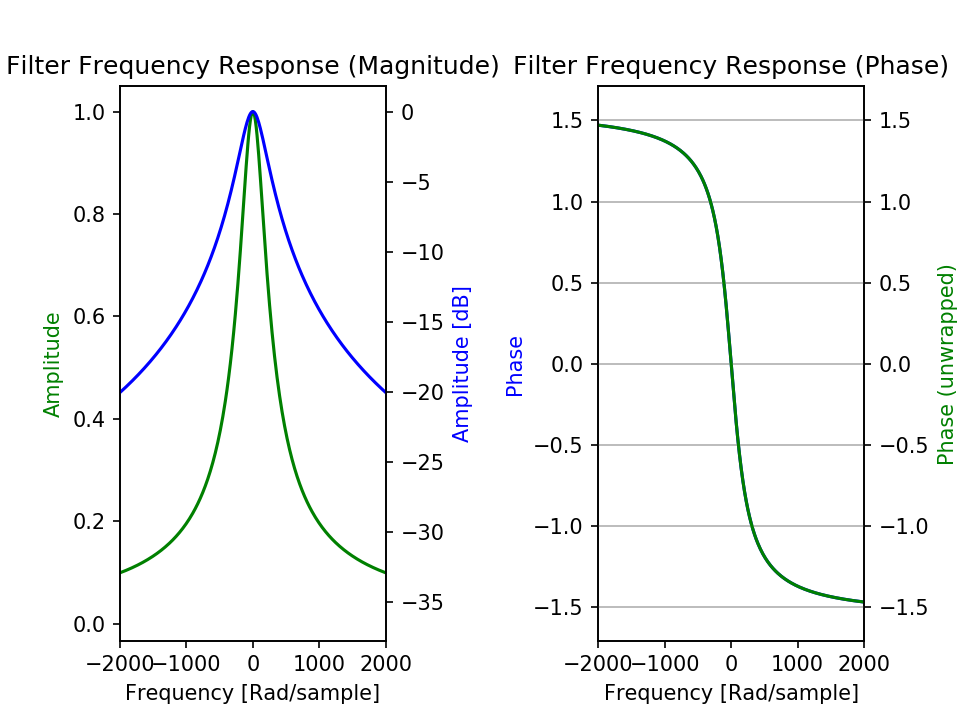

1.0 0.894375025481141


<IPython.core.display.Javascript object>


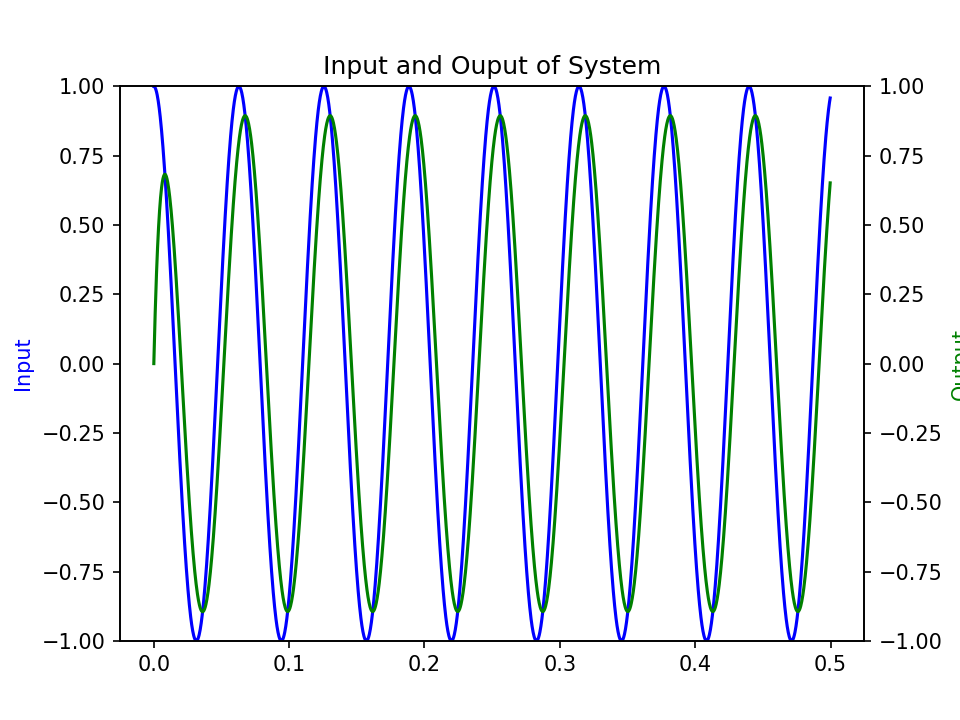

(-1, 1)

In [18]:
#Assignment 1 - Filtering

#Part A
fs = 4000
t = np.arange(0, 0.5, 1/fs)
x1 = np.cos(100 * t)

#Part B
b = [200]
a = [1, 200]
sys = signal.lti(b,a)
f = np.arange(-len(t)/2, len(t)/2, 1) * fs / len(t)
w = f * 2 * np.pi
w2, h_f = signal.freqresp(sys, w)

fig1 = plt.figure(1)
fig1.subplots_adjust(hspace=1, wspace=.8)

ax1 = fig1.add_subplot(1,2,1)
plt.plot(w2, abs(h_f), 'g')
plt.ylabel('Amplitude', color = 'g')
plt.xlabel('Frequency [Rad/sample]')
plt.xlim(-2000, 2000)

ax2 = ax1.twinx()
plt.title('Filter Frequency Response (Magnitude)')
plt.plot(w2, 20 * np.log10(abs(h_f)), 'b')
plt.ylabel('Amplitude [dB]', color = 'b')

ax3 = fig1.add_subplot(1,2,2)
plt.title('Filter Frequency Response (Phase)')
plt.plot(w2, np.angle(h_f), 'b')
plt.xlabel('Frequency [Rad/sample]')
plt.ylabel('Phase', color='b')

ax4 = ax3.twinx()
angles = np.unwrap(np.angle(h_f))
plt.plot(w2, angles, 'g')
plt.ylabel('Phase (unwrapped)', color='g')
plt.grid()
plt.axis('tight')
plt.xlim(-2000, 2000)

#Part C
ty, y1, xs = signal.lsim(sys, x1, t)
print(np.max(x1),np.max(y1))
fig2 = plt.figure(2)
ax5 = fig2.add_subplot(1,1,1)
plt.title('Input and Ouput of System')
plt.plot(t, x1, 'b')
plt.ylabel('Input', color='b')
plt.ylim(-1, 1)

ax6 = ax5.twinx()
plt.plot(t, y1, 'g')
plt.ylabel('Output', color='g')
plt.xlabel('Time')
plt.ylim(-1, 1)

### Discussion

Because the gain of the filter is less than 1, the overall amplitude of the response will be x1's amplitude times the gain of the filter. Therefore, if we filter the two signals with the same filter, then the x1 will be smaller than a single filter because it is being multiplied by the gain of the filter twice. 

## Assignment 2 -- Amplitude Modulation

<IPython.core.display.Javascript object>


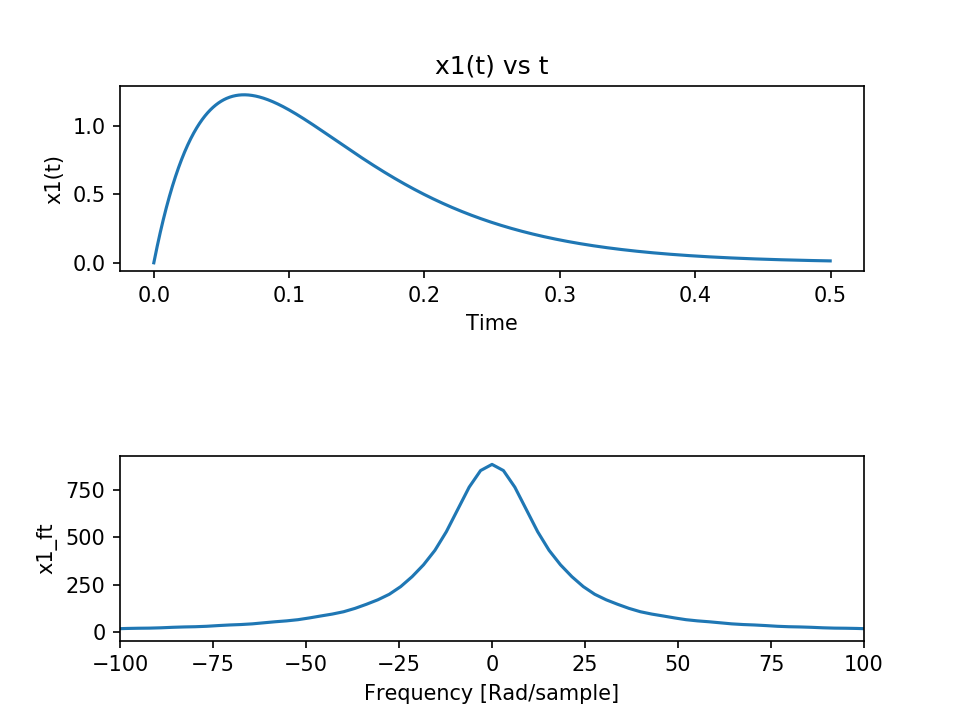

<IPython.core.display.Javascript object>


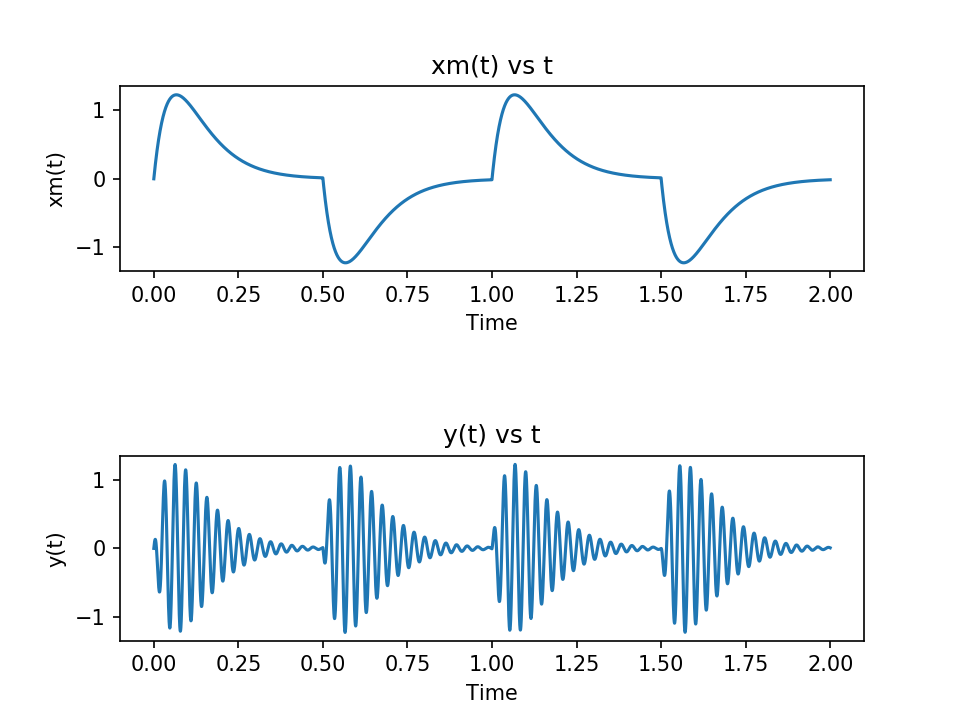

<IPython.core.display.Javascript object>


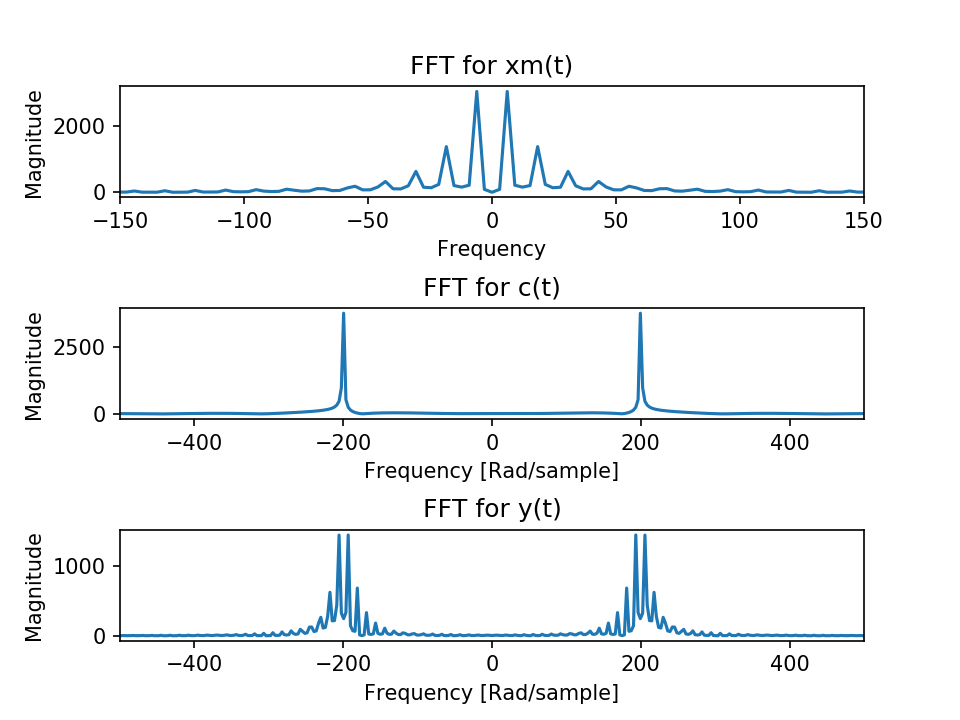

(-500, 500)

In [19]:
# Assignment 2 - Amplitude Modulation

# Part A
def u(t):
    return 1.0 * (t > 0) 

fs = 4000
t = np.arange(0, 0.5, 1 / fs)
x1 = 50 * t * np.exp(-15 * t) * u(t)
x0 = -x1
N = 8192

x1_ft = np.fft.fft(x1, N)
x1_ft = np.fft.fftshift(x1_ft)
x1_ft = np.abs(x1_ft)
f = np.arange(-N/2, N/2, 1) * fs / (N)
w = f * 2 * np.pi

fig3=plt.figure(3)
fig3.subplots_adjust(hspace=1, wspace=1)

plt.subplot(2,1,1)
plt.plot(t, x1)
plt.ylabel('x1(t)')
plt.xlabel('Time')
plt.title('x1(t) vs t')

plt.subplot(2,1,2)
plt.plot(w, x1_ft)
plt.ylabel('x1_ft')
plt.xlabel('Frequency [Rad/sample]')
plt.xlim(-100, 100)

# Part B
xm = np.concatenate([x1, x0, x1, x0])
t4 = np.arange(0, 2, 1/fs)
c = np.cos(200 * t4)
y = xm * c

# Part C
fig4=plt.figure(4)
fig4.subplots_adjust(hspace=1, wspace=1)

plt.subplot(2,1,1)
plt.plot(t4, xm)
plt.ylabel('xm(t)')
plt.xlabel('Time')
plt.title('xm(t) vs t')

plt.subplot(2,1,2)
plt.plot(t4, y)
plt.title('y(t) vs t')
plt.xlabel('Frequency [Rad/sample]')
plt.ylabel('y(t)')
plt.xlabel('Time')

# Part D
xm_ft = np.fft.fft(xm, N)
xm_ft = np.fft.fftshift(xm_ft)
xm_ft = np.abs(xm_ft)

c_ft = np.fft.fft(c, N)
c_ft = np.fft.fftshift(c_ft)
c_ft = np.abs(c_ft)

y_ft = np.fft.fft(y, N)
y_ft = np.fft.fftshift(y_ft)
y_ft = np.abs(y_ft)

fig5 = plt.figure(5)
fig5.subplots_adjust(hspace=1, wspace=1)

plt.subplot(3,1,1)
plt.plot(w, xm_ft)
plt.ylabel('Magnitude')
plt.xlabel('Frequency')
plt.title('FFT for xm(t)')
plt.xlim(-150, 150)

plt.subplot(3,1,2)
plt.plot(w, c_ft)
plt.ylabel('Magnitude')
plt.xlabel('Frequency [Rad/sample]')
plt.title('FFT for c(t)')
plt.xlim(-500, 500)

plt.subplot(3,1,3)
plt.plot(w, y_ft)
plt.ylabel('Magnitude')
plt.xlabel('Frequency [Rad/sample]')
plt.title('FFT for y(t)')
plt.xlim(-500, 500)

### Discussion

A modulation can never be an LTI because the system fails the TI test because cos(200t) does not vary when we set x(t-t0). 

## Assignment 3 -- Amplitude Demodulation

<IPython.core.display.Javascript object>


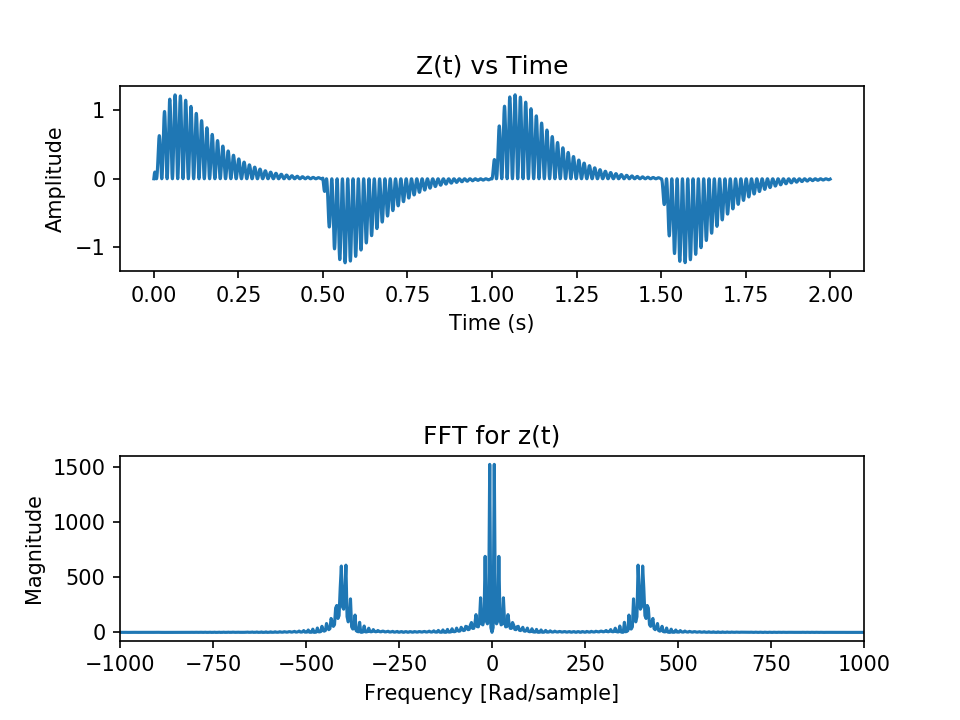

<IPython.core.display.Javascript object>


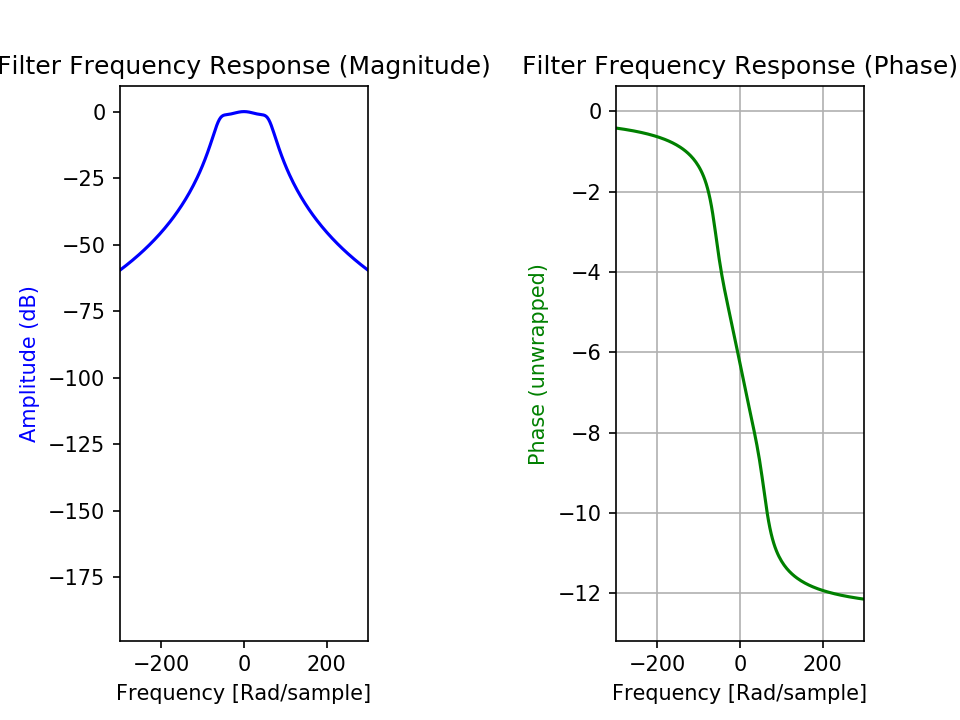

<IPython.core.display.Javascript object>


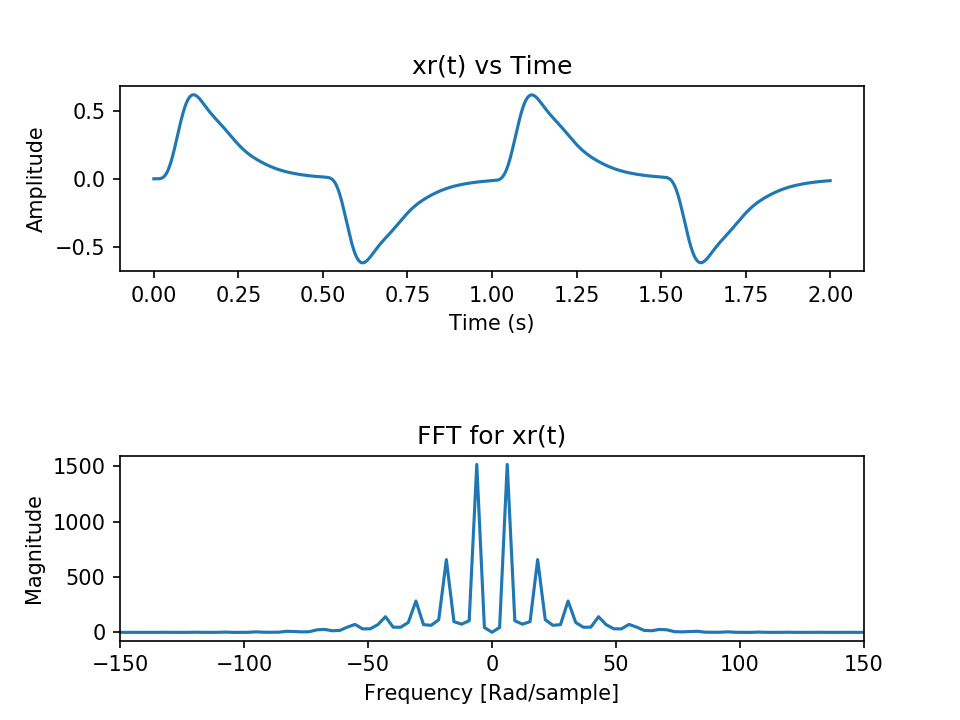

(-150, 150)

In [20]:
# Assignment 3 -- Amplitude Demodulation

# Part A
nfft = 8192
fs = 4000
t = np.arange(0, 2, 1 / fs)

z = c * y
z_ft = np.fft.fft(z, nfft)
z_ft = np.fft.fftshift(z_ft)
z_ft = np.abs(z_ft)

f_z = np.arange(-nfft / 2, nfft / 2, 1) * fs / (nfft)
w_z = f_z * 2 * np.pi

fig6 = plt.figure(6)
fig6.subplots_adjust(hspace=1, wspace=1)

plt.subplot(2, 1, 1)
plt.plot(t, z)
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.title('Z(t) vs Time')

plt.subplot(2,1,2)
plt.plot(w_z, z_ft)
plt.ylabel('Magnitude')
plt.xlabel('Frequency [Rad/sample]')
plt.title('FFT for z(t)')
plt.xlim(-1000, 1000)

# Part B
b = [2000000000]
a = [240, 30000, 2200000, 100000000, 2000000000]
sys = signal.lti(b, a)
f = np.arange(-len(t) / 2, len(t) / 2, 1) * fs / len(t)
w = f * 2 * np.pi
w_resp, h_resp = signal.freqresp(sys, w)

fig7 = plt.figure(7)
fig7.subplots_adjust(hspace=1, wspace=1)

plt.subplot(1, 2, 1)
plt.plot(w_resp, 20 * np.log10(abs(h_resp)), 'b')
plt.ylabel('Amplitude (dB)', color = 'b')
plt.xlabel('Frequency [Rad/sample]')
plt.title('Filter Frequency Response (Magnitude)')
plt.xlim(-300, 300)

plt.subplot(1, 2, 2)
unwrapped = np.unwrap(np.angle(h_resp))
plt.plot(w_resp, unwrapped, 'g')
plt.ylabel('Phase (unwrapped)', color = 'g')
plt.title('Filter Frequency Response (Phase)')
plt.xlabel('Frequency [Rad/sample]')
plt.grid()
plt.axis('tight')
plt.xlim(-300, 300)

# Part C
t_xrt, xrt, xs = signal.lsim((b, a), z, t)

xrt_ft = np.fft.fft(xrt, nfft)
xrt_ft = np.fft.fftshift(xrt_ft)
xrt_ft = np.abs(xrt_ft)

f_xrt = np.arange(-nfft / 2, nfft / 2, 1) * fs / (nfft)
w_xrt = f_xrt * 2 * np.pi

fig8 = plt.figure(8)
fig8.subplots_adjust(hspace=1, wspace=1)

plt.subplot(2, 1, 1)
plt.plot(t_xrt, xrt)
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.title('xr(t) vs Time')

plt.subplot(2,1,2)
plt.plot(w_xrt, xrt_ft)
plt.ylabel('Magnitude')
plt.xlabel('Frequency [Rad/sample]')
plt.title('FFT for xr(t)')
plt.xlim(-150, 150)

### Discussion

This student is incorrect because 

## Assignment 4 - Decoding a Morse Code Message

In [21]:
def decode(x1, fs):
    t1 = np.arange(0, 0.5, 1/fs)
    dash = 50 * t1 * np.exp(-15 * t1) * u(t1)
    dot = -dash

    library = {"01":"a", "1000":"b", "1010":"c", "101":"d", "0":"e", "0010":"f", "110":"g", "0000":"h", "00":"i", "0111":"j", "101":"k", "0100":"l", "11":"m", "10":"n", "111":"o", "0110":"p", "1101":"q", "010":"r", "000":"s", "1":"t", "001":"u", "0001":"v", "011":"w", "1001":"x", "1011":"y", "1100":"z"}

    result = ""
    
    for i in range (0, 4):
        dasherr = (x1[i*2000:(i+1)*2000] -dash) ** 2
        dasherr = np.sum(dasherr)
        doterr = (x1[i*2000:(i+1)*2000] - dot) ** 2
        doterr = np.sum(doterr)
        dotnone = (x1[i*2000:(i+1)*2000]) ** 2
        dotnone = np.sum(dotnone)
        
        
        if ((dasherr < doterr) and (dasherr < (dotnone * 10))):
            result = result + "1"
        elif ((doterr < dasherr) and (doterr < (dotnone * 10))):
            result = result + "0"
    
    return library[result]

In [23]:
fs = 4000
t = np.arange(0, 2, 1/fs)
file = open('message_modulated.csv', 'rb')
y = np.loadtxt(file, delimiter=',')

for i in range(1,5):
    if (i != 3):
        z = y * np.cos(i * 100 * t)
        b1 = [2e9]
        a1 = [240, 3e4, 2.2e6, 1e8, 2e9]
        sys1 = signal.lti(b1,a1)
        tr, xr, xs = signal.lsim(sys1, z, t)
        print("Message m" + str(i) + "(t) is: " + decode(xr, fs))
        



Message m1(t) is: y
Message m2(t) is: o
Message m4(t) is: u
